In [11]:
import os 
import sys

%matplotlib inline
import matplotlib.pyplot as plt

from desilike.samples import Profiles, Chain, plotting

sys.path.append('../bin')
from emulator_fit import get_power_likelihood

plt.style.use(os.path.join(os.path.abspath('../bin'), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

In [13]:
tracer = 'ELG_LOP'
region = 'SGC'
version = 'v3'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/{}'.format(version)

template_name = 'shapefitqisoqap'

emulator_dir = os.path.join(data_dir, 'emulators/emulators_{}_{}'.format(template_name, tracer))

#chains_dir = os.path.join(data_dir, 'chains', 'chains_{}_{}_{{}}{}'.format(template_name, tracer, region))
#chain_nocut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'power_velocileptors_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])

chains_dir = os.path.join(data_dir, 'chains', 'chains_{}_{}_{{}}{}'.format(template_name, tracer, region))
chain_thetacut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'power_velocileptors_thetacut0.05_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_thetacut_sculptwindow = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'power_velocileptors_thetacut0.05_sculptwindow_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_thetacut_sculptwindow_priors = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'power_velocileptors_thetacut0.05_sculptwindow_priors1_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])

In [14]:
from getdist import plots
g = plots.get_single_plotter(width_inch=6, scaling=False, ratio=1)
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 12
g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

<Figure size 600x600 with 0 Axes>

Removed no burn in
Removed no burn in
Removed no burn in


/tmp/ipykernel_163328/3750165031.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(plots_dir, version, 'corner_plot_power_cut_sculptwindow_{}_{}.pdf'.format(tracer, region)), dpi=300)
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20231013-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


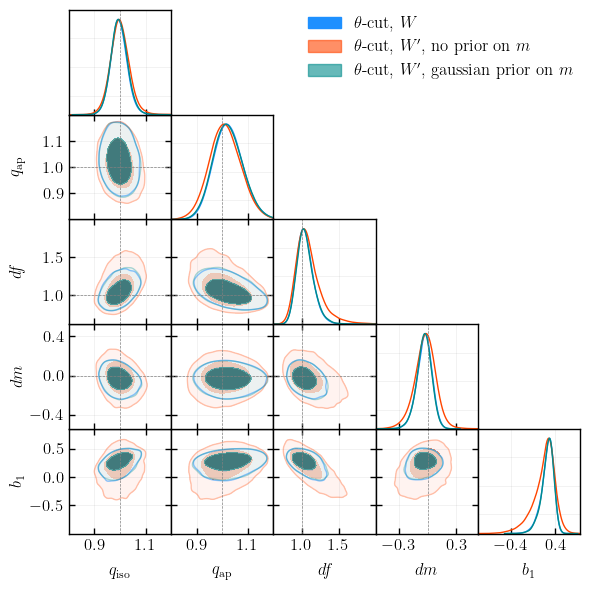

In [15]:
markers = {'qiso': 1., 'qap': 1., 'df': 1., 'dm': 0.}
#params = ['qiso', 'qap', 'df', 'dm', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'sn4']
params = ['qiso', 'qap', 'df', 'dm', 'b1']
colors = ['dodgerblue', 'orangered', 'darkcyan']
plotting.plot_triangle([chain_thetacut, chain_thetacut_sculptwindow, chain_thetacut_sculptwindow_priors], labels=[r'$\theta$-cut, $W$', r'$\theta$-cut, $W^{\prime}$, no prior on $m$', r'$\theta$-cut, $W^{\prime}$, gaussian prior on $m$'], 
                       markers=markers, params=params,
                       g=g, lws=1., contour_lws=1., filled=[True, True, True], colors=colors, contour_colors=colors, ls=['-', '-', '-'], contour_ls=['-', '-', '-'],
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, version, 'corner_plot_power_cut_sculptwindow_{}_{}.pdf'.format(tracer, region)), dpi=300)
plt.show()

In [5]:
plotting.plot_triangle([chain_thetacut_sculptwindow, chain_thetacut_sculptwindow_priors], labels=[r'No prior', r'Gaussian prior'], 
                       markers=markers, params=['alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'sn4', 'syst_0', 'syst_1', 'syst_2'],
                       g=g, lws=1., contour_lws=1., filled=True, colors=colors, contour_colors=colors, contour_ls=['-', '--'],
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.show()

Removed no burn in
Removed no burn in


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20231013-1.0.0/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)


In [7]:
print(chain_thetacut_sculptwindow_priors.sample_solved().to_stats(params=['syst_0', 'syst_1', 'syst_2'], tablefmt='pretty'))

+--------+--------+------+--------+-----+-----------------+-----------------+
|        | argmax | mean | median | std | quantile:1sigma | interval:1sigma |
+--------+--------+------+--------+-----+-----------------+-----------------+
| syst_0 |   80   |  00  |   00   | 270 |    -270/+270    |    -270/+270    |
| syst_1 |  -13   |  -2  |   -2   | 25  |     -25/+25     |     -23/+26     |
| syst_2 |   -2   |  0.  |   0.   | 15  |     -15/+15     |     -15/+15     |
+--------+--------+------+--------+-----+-----------------+-----------------+


In [15]:
print(chain_thetacut_sculptwindow.sample_solved().to_stats(params=['sn0', 'sn2', 'sn4'], tablefmt='pretty'))

+-----+--------+-------+--------+------+-----------------+-----------------+
|     | argmax | mean  | median | std  | quantile:1sigma | interval:1sigma |
+-----+--------+-------+--------+------+-----------------+-----------------+
| sn0 |  0.16  | -0.35 | -0.33  | 0.43 |   -0.40/+0.41   |   -0.36/+0.45   |
| sn2 |  -2.0  |  6.4  |  5.6   | 9.6  |    -9.2/+9.2    |   -10.2/+8.0    |
| sn4 |  -10   |  -20  |  -20   | 140  |    -130/+130    |    -120/+150    |
+-----+--------+-------+--------+------+-----------------+-----------------+


In [ ]:
params = ['qiso', 'qap', 'df', 'dm', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'sn4']